# Project 1. Twitter US Airline Sentiment and Insights from Electric Vehicle Population Analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import nltk
import re
import requests
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

## 1. Gather data

### **1.1.** Problem Statement
In this study, we analyze a Twitter dataset containing US airline reviews. Our objectives are as follows:
1. Overall Sentiment: We aim to determine whether the overall sentiment is more negative or positive
2. Airline Rankings: We identify which airline receives the most negative reviews.
3. Negative Keywords: We explore keywords associated with negative reviews and suggest improvements.


#### **Dataset 1**
Dataset 1 Context: Tweets dataset was gathered as a CSV file from Twitter. The data was narrowed down to focus on US Airline sentiment analysis. Dataset 1 contain 15 columns and 14640 rows of data. 

Type: csv file

Method: Downloading files from https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/data

Dataset variables: tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone

In [2]:
#Load Dataset 1
df1=pd.read_csv(r'C:/Users/keza/Documents/Udacity/Project1 data wrangling/Tweets.csv')

#### **Dataset 2**
Dataset 2 Context: Dataset was collected through Data.gov, it is about electic vehicle populationd data, contains 191407 rows and 17 columns.

Type:Json file from https://catalog.data.gov/dataset/electric-vehicle-population-data

Method: programmatically downloading files

Dataset variables: VIN,County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range,Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract

In [3]:
#Loading Dataset2
#Download Json file programmatically
# URL of the JSON file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.json?accessType=DOWNLOAD"

# Send a GET request to the URL
response = requests.get(url)
# Check if the request was successful
if response.status_code == 200:
    # Get the content of the response (JSON data)
    json_data = response.content
    # Save the JSON data to a file
    with open("data.json", "wb") as file:
        file.write(json_data)
    print("JSON data successfully downloaded and saved as data.json")
else:
    print(f"Error downloading JSON data. Status code: {response.status_code}")

JSON data successfully downloaded and saved as data.json


In [4]:
#url link of Json file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.json?accessType=DOWNLOAD"
#send get request to the url
response=requests.get(url)
#loading json file
data = json.loads(response.text)
#extract 'data' from json file
data_list=data['data']
# Initialize an empty list to store DataFrames
dfs = []
# Iterate over each data element and create a DataFrame
for data in data_list:
    extracted_data = data[8:25]
    df = pd.DataFrame([extracted_data])
    dfs.append(df)
# Concatenate all DataFrames into a single DataFrame
df2 = pd.concat(dfs, ignore_index=True)
# Print the resulting DataFrame, all columns have no name
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,5YJSA1E22K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006500
1,3MW39FS05R,Yakima,Zillah,WA,98953,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,53077002201
2,1N4AZ0CP0F,King,Kent,WA,98031,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306
3,5YJSA1H20F,Snohomish,Bothell,WA,98012,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,53061052107
4,JTMAB3FV1N,Yakima,Yakima,WA,98908,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14,221023589,POINT (-120.611068 46.596645),PACIFICORP,53077000902


## 2. Assess data

#### **Dataset 1**

### Quality Issue 1: nan values in this dataset

#### Inspecting the dataframe visually

In [5]:
#View the first few rows of dataset1, checking data quality issue, there are some nan data shown in multiple columns
df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### Inspecting the dataframe programmatically

In [6]:
#View the last few rows of df1
df1.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [7]:
#returns five random entry from df1
df1.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
9044,570271713512046592,positive,0.6549,NaN,NaN,US Airways,NaN,JenRomanoff,NaN,0,@USAirways thanks !!!,NaN,2015-02-24 09:19:06 -0800,NaN,Eastern Time (US & Canada)
2244,569299401643917313,negative,1.0000,Late Flight,0.3432,United,NaN,cbtadvisors,NaN,0,@united From the air: Another missed cnxn 2day...,NaN,2015-02-21 16:55:29 -0800,"Cambridge, MA, USA",Central Time (US & Canada)
6226,568108822360760320,neutral,1.0000,NaN,NaN,Southwest,NaN,JiggaJazzman,NaN,0,@SouthwestAir Are you announcing any more winn...,"[40.4871427, -112.011264]",2015-02-18 10:04:32 -0800,NaN,NaN
2953,568817637754593280,negative,1.0000,Lost Luggage,1.0000,United,NaN,NorbertJaw,NaN,0,@united Without baggage for 5 days and can't g...,NaN,2015-02-20 09:01:07 -0800,NaN,NaN
3446,568434065067491328,negative,0.6489,Can't Tell,0.3298,United,NaN,pdxmucci,NaN,0,"@united I need you to get my cousin to PDX, sh...",NaN,2015-02-19 07:36:56 -0800,"Portland, OR",NaN


In [8]:
#show the information of df1, we can use this summary of df1 to check completeness. Looking at the infor of df1, each column should has 14640 data, some columns have missing data, we need to take a look of missing data. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
#get the data types of different variables in df1, to check validity of df1. airline_sentiment, negative reason, airline, text,  should be formated as string.
df1.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [10]:
#describe the dataframe, used to check accuracy and consistency of df1, airline_sentiment_confidence, negativereason_confidence values are between 0 to 1. Observe this table below, we can tell 25%, 50%, and 75% of negativereason_confidence, the gap betwen is large. By checking null values, there are 4118 null data are effecting this result, we need work on the null data to make more accurate and consistant analysis.  
df1.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [11]:
#identify nuall values in df1, there are missing data in negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location, and user_timezone columns. Mispresenting missing values can cause validity issue.
df1.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Quality Issue 2: Data are not all unique

In [12]:
#Check uniqueness, all other variables can have duplicated results, names can be the same with similar feedback to airlines, but tweet_id should be unique. To provide high quality data, each tweet_id should be taken only once. 
df1.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

### Tidiness Issue 1: missing data

In [13]:
#Inspecting the dataframe visually
#Visually inspect the df1, a good data structure should has each variable forms a column, each observation forms a row, and each type of observational unit forms a table. df1 is clearly formatted with the column names. Each row consisting of a single observation, and the cells int eh dataset being single values. 
df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Tidiness Issue 2: inconsistent data types

In [14]:
#Visually inspect the info() results 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [15]:
#get dimensionality of df1
df1.shape

(14640, 15)

In [16]:
#Inspecting the dataframe programmatically
#Get all of the column labels in our dataset programmatically.
df1.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [17]:
#Get the index of the data
df1.index

RangeIndex(start=0, stop=14640, step=1)

#### **Dataset 2**

### Quality Issue 1: too many zero values in this dataset

### Tidiness Issue 1: No column names

In [18]:
# Inspecting the dataframe visually
# View the first few rows of the dataframe of dataset2. Checking data quality issue, all columns have no names
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,5YJSA1E22K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006500
1,3MW39FS05R,Yakima,Zillah,WA,98953,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,53077002201
2,1N4AZ0CP0F,King,Kent,WA,98031,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306
3,5YJSA1H20F,Snohomish,Bothell,WA,98012,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,53061052107
4,JTMAB3FV1N,Yakima,Yakima,WA,98908,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14,221023589,POINT (-120.611068 46.596645),PACIFICORP,53077000902


In [19]:
#new column names
new_column_names=['VIN','County','City','State','Postal Code','Model Year','Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Range','Base MSRP','Legislative District','DOL Vehicle ID','Vehicle Location','Electric Utility','2020 Census Tract']
#replace new column names to df2
df2.columns=new_column_names
#view the first few rows of df2
df2.head()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006500
1,3MW39FS05R,Yakima,Zillah,WA,98953,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,53077002201
2,1N4AZ0CP0F,King,Kent,WA,98031,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306
3,5YJSA1H20F,Snohomish,Bothell,WA,98012,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,53061052107
4,JTMAB3FV1N,Yakima,Yakima,WA,98908,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14,221023589,POINT (-120.611068 46.596645),PACIFICORP,53077000902


### Tidiness Issue 2: two variables saved in one column (lattitude and longitude saved in vehicle location column)

#### Inspecting the dataframe programmatically

In [20]:
#View the last few rows of df2
df2.tail()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53053073302
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53053070206
191404,7SAYGDEE4R,King,Fall City,WA,98024,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032601
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,53027001100
191406,7SAYGAEEXP,Benton,Richland,WA,99352,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8,233761440,POINT (-119.2958528 46.2421419),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,53005010811


In [21]:
#returns five random entry from df2
df2.sample(5)

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
117014,7SAYGDEE1P,Snohomish,Brier,WA,98036,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,249573278,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC,53061051913
147323,KNDAEFS58R,King,Newcastle,WA,98056,2024,KIA,EV9,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,262737961,POINT (-122.1819876 47.5098889),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024703
55734,7SAYGDEE2N,King,Issaquah,WA,98029,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5,245773174,POINT (-122.0209893 47.5632565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032221
92091,5YJ3E1EB4P,Benton,Richland,WA,99352,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8,260283852,POINT (-119.2958528 46.2421419),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,53005010818
148642,YV4ED3UW8P,Pierce,University Place,WA,98467,2023,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,28,234989814,POINT (-122.5325066 47.2051509),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072312


In [22]:
#show the information of df2, each colummn should has 191407 data, some columns have a few missing data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN                                                191407 non-null  object
 1   County                                             191403 non-null  object
 2   City                                               191403 non-null  object
 3   State                                              191407 non-null  object
 4   Postal Code                                        191403 non-null  object
 5   Model Year                                         191407 non-null  object
 6   Make                                               191407 non-null  object
 7   Model                                              191407 non-null  object
 8   Electric Vehicle Type                              191407 non-null  object
 9   Clea

In [23]:
#get the data types of different variables in df2 to check validity of df2. All variables are object. County, city, state. etc should be formated as string
df2.dtypes

VIN                                                  object
County                                               object
City                                                 object
State                                                object
Postal Code                                          object
Model Year                                           object
Make                                                 object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
Electric Range                                       object
Base MSRP                                            object
Legislative District                                 object
DOL Vehicle ID                                       object
Vehicle Location                                     object
Electric Utility                                     object
2020 Census Tract                       

In [24]:
#change columns from object to string
str_col = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']
df2[str_col] = df2[str_col].astype(str)

#change columns from object to numeric
num_cols=['Postal Code', 'Model Year', 'Electric Range','Base MSRP', 'Legislative District', 'DOL Vehicle ID','2020 Census Tract']
df2[num_cols] = df2[num_cols].apply(pd.to_numeric, errors='coerce')

#describe the dataframe, used to check accuracy and consistency of df2. we can see most cars model year is 2023. Based MSRP is not accurate due to many zeros in the result. Electric range result is not accurate due to many zeros in the results. 
df2.describe()


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,191403.000000,191407.000000,191407.000000,191407.000000,190993.000000,1.914070e+05,1.914030e+05
mean,98177.823603,2020.732335,55.657442,994.773258,29.016880,2.237202e+08,5.297759e+10
std,2392.808886,2.990487,90.151930,8050.523372,14.909417,7.398058e+07,1.573588e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.861622e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.328176e+08,5.303303e+10
75%,98371.000000,2023.000000,72.000000,0.000000,42.000000,2.589708e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [25]:
#shown missing data in the dataframe. There are missing data in column country, city, postal code, electric utility, and 2020 census tract, 8 missing data in vehicle location and 414 missing data in legislative district.
df2.isnull().sum()

VIN                                                    0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      4
dtype: int64

### Quality Issue 2: duplicated data

In [26]:
#Find number of unique values, each vehicle should has a unique VIN, there are some duplciates data 
df2.nunique()

VIN                                                   11487
County                                                  198
City                                                    745
State                                                    46
Postal Code                                             892
Model Year                                               23
Make                                                     42
Model                                                   147
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          103
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       191407
Vehicle Location                                        892
Electric Utility                                         76
2020 Census Tract                       

In [27]:
#Visually inspect the df2
df2.head()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [28]:
#get dimensionality of df1
df2.shape

(191407, 17)

In [29]:
#Get all of the column labels in our dataset programmatically.
df2.columns

Index(['VIN', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make',
       'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [30]:
#Get the index of the data
df2.index

RangeIndex(start=0, stop=191407, step=1)

## 3. Clean data

In [31]:
#Make copies of the datasets to ensure the raw dataframes 
#make a copy of df1
cleaned_df1=df1.copy()
#make a copy of df2
cleaned_df2=df2.copy()

### Dataset 1

### Quality Issue 1: Data are not all unique

In [32]:
#check if there are duplicated data 
if_dup1 = cleaned_df1.duplicated(['tweet_id'])
#count duplicates
dup_count1 = cleaned_df1.duplicated(['tweet_id']).sum()
#drop duplicates
cleaned_df1=cleaned_df1.drop_duplicates(['tweet_id'])
#Interpretation, each tweet_id should be unique unlike other columns. To get true evaluation, each id should only rate once, not multiple tumes. As mentioned previously, .nunioque() showed that there are 155 duplicated data from tweet_id.

#Validate the cleaning was successful, when check unique value of df1, there are 14485 data, updated result below matched.
cleaned_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14485 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14485 non-null  int64  
 1   airline_sentiment             14485 non-null  object 
 2   airline_sentiment_confidence  14485 non-null  float64
 3   negativereason                9082 non-null   object 
 4   negativereason_confidence     10416 non-null  float64
 5   airline                       14485 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14485 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14485 non-null  int64  
 10  text                          14485 non-null  object 
 11  tweet_coord                   1007 non-null   object 
 12  tweet_created                 14485 non-null  object 
 13  tweet_

### Tidiness Issue 1: missing data

In [33]:
#drop unnessary columns 
drop_col1=['negativereason', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone','name','tweet_created', 'retweet_count']
cleaned_df1=cleaned_df1.drop(drop_col1,axis=1)
#check if drop columns still exist, Validate the cleaning was successful
cleaned_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14485 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14485 non-null  int64  
 1   airline_sentiment             14485 non-null  object 
 2   airline_sentiment_confidence  14485 non-null  float64
 3   negativereason_confidence     10416 non-null  float64
 4   airline                       14485 non-null  object 
 5   text                          14485 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 792.1+ KB


### Quality Issue 2: nan values in this dataset

In [34]:
# missing data, repace nan to ' '
cleaned_df1['negativereason_confidence'] = cleaned_df1['negativereason_confidence'].replace({np.nan: ' '})
#confirm result, no nan data, Validate the cleaning was successful
cleaned_df1.isnull().sum().sum()

0

### Tidiness Issue 2: inconsistent data types

In [35]:
#show head of cleaned df1 data
cleaned_df1.head()
#Interpretation: in the text column, there are many spceical characters 
#remove all special characters in text and saved in cleaned_text column
cleaned_df1['cleaned_text'] = cleaned_df1['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\\s]', ' ', x))
#drop text column
cleaned_df1=cleaned_df1.drop(['text'],axis=1)
#Validate the cleaning was successful, no more spcecial characters in text column
cleaned_df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,airline,cleaned_text
0,570306133677760513,neutral,1.0000,,Virgin America,VirginAmerica What dhepburn said
1,570301130888122368,positive,0.3486,0.0,Virgin America,VirginAmerica plus you ve added commercials t...
2,570301083672813571,neutral,0.6837,,Virgin America,VirginAmerica I didn t today Must mean I n...
3,570301031407624196,negative,1.0000,0.7033,Virgin America,VirginAmerica it s really aggressive to blast...
4,570300817074462722,negative,1.0000,1.0,Virgin America,VirginAmerica and it s a really big bad thing...


### Dataset 2

### Quality Issue 1: duplicated data

In [36]:
#check if there are duplicated data, each vehicle should has a unique VIN as ID, there are 179920 data are duplicates
if_dup2 = cleaned_df2.duplicated(['VIN'])
#count duplicates
dup_count2 = cleaned_df2.duplicated(['VIN']).sum()
#drop duplicates, after removed duplicates, data counts matched
cleaned_df2=cleaned_df2.drop_duplicates(['VIN'])
cleaned_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11487 entries, 0 to 191348
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN                                                11487 non-null  object 
 1   County                                             11487 non-null  object 
 2   City                                               11487 non-null  object 
 3   State                                              11487 non-null  object 
 4   Postal Code                                        11484 non-null  float64
 5   Model Year                                         11487 non-null  int64  
 6   Make                                               11487 non-null  object 
 7   Model                                              11487 non-null  object 
 8   Electric Vehicle Type                              11487 non-null  object 
 9   Clean Alte

### Quality Issue 2: too many zero values in this dataset

In [37]:
#drop unnessary columns 
drop_col2=['Electric Range','Base MSRP', 'Legislative District', 'DOL Vehicle ID','Electric Utility', '2020 Census Tract']
cleaned_df2=cleaned_df2.drop(drop_col2,axis=1)
#check if drop columns still exist, Validate the cleaning was successful 
cleaned_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11487 entries, 0 to 191348
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN                                                11487 non-null  object 
 1   County                                             11487 non-null  object 
 2   City                                               11487 non-null  object 
 3   State                                              11487 non-null  object 
 4   Postal Code                                        11484 non-null  float64
 5   Model Year                                         11487 non-null  int64  
 6   Make                                               11487 non-null  object 
 7   Model                                              11487 non-null  object 
 8   Electric Vehicle Type                              11487 non-null  object 
 9   Clean Alte

### Tidiness Issue 1: missing data

In [38]:
#confirm result, after dropping unncessary columns, there are 3 missing data in postal code column
cleaned_df2.isnull().sum()
# missing data, repace nan to ' '
cleaned_df2['Postal Code'] = cleaned_df2['Postal Code'].replace({np.nan: ' '})
#confirm result once more time
cleaned_df2.isnull().sum().sum()
#show head of cleaned df2cleaned_df2 data
cleaned_df2.head()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.300312 47.629782)
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-120.2658133 46.4063477)
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.201564 47.402358)
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.206146 47.839957)
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-120.611068 46.596645)


### Tidiness Issue 2: two variables saved in one column (lattitude and longitude saved in vehicle location column)

In [39]:
# Extract latitude and longitude from 'Vehicle Location'
cleaned_df2['Latitude'] = cleaned_df2['Vehicle Location'].str.extract(r'(-?\d+\.\d+)')[0].astype(float)
cleaned_df2['Longitude'] = cleaned_df2['Vehicle Location'].str.extract(r'(-?\d+\.\d+)\s(-?\d+\.\d+)')[1].astype(float)
# Drop the original 'Vehicle Location' column
cleaned_df2.drop(columns=['Vehicle Location'], inplace=True)
# Print the updated dataframe, Validate the cleaning was successful
cleaned_df2.head()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Latitude,Longitude
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,-122.300312,47.629782
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,-120.265813,46.406348
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,-122.201564,47.402358
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,-122.206146,47.839957
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,-120.611068,46.596645


## 4. Update your data store

In [40]:
#save dataset1 
cleaned_df1.to_csv('Cleaned Tweets.csv', index=False)
#save dataset2
cleaned_df2.to_csv('Cleaned Vehicle.csv', index=False)

## 5. Answer the research question

### Dataset 1

Text(0.5, 1.0, 'Count of Type of Sentiment')

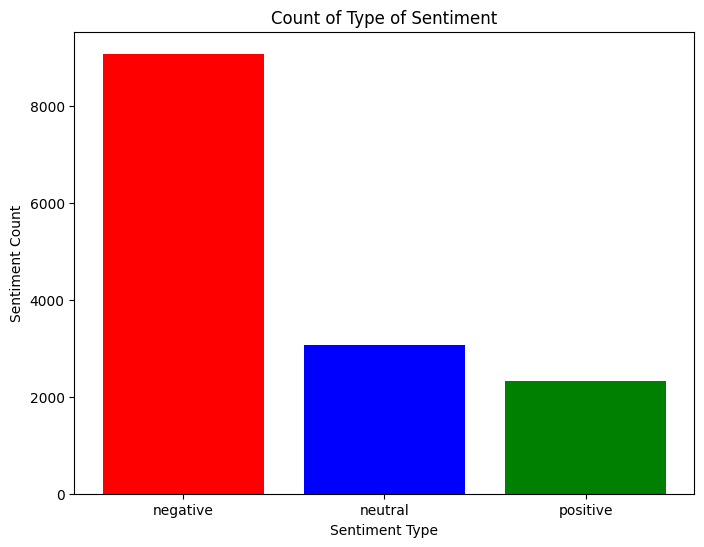

In [41]:
#Visual 1.1, overall sentiment of US Airline 
counter = cleaned_df1.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(8,6))
plt.bar(index,counter,color=['red','blue', 'green'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

<Axes: xlabel='airline'>

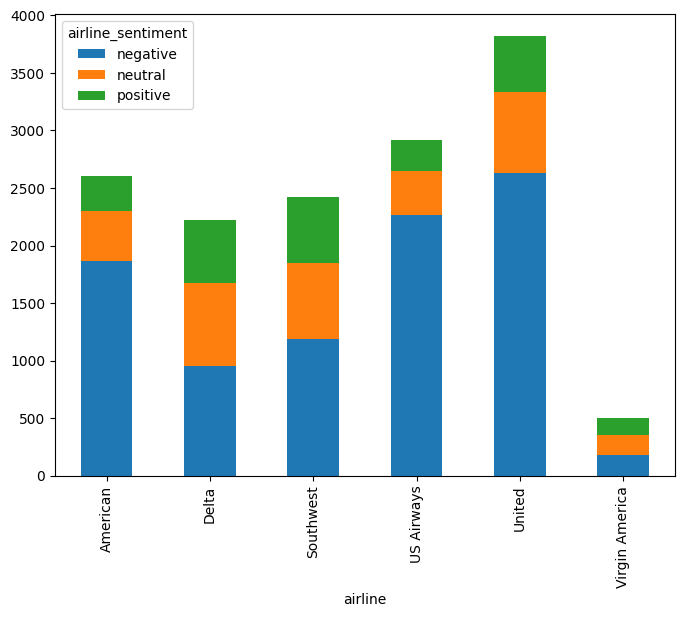

In [42]:
#Visual 1.2, a stacked bar chart of each airline on sentiment analysis. This graph showed that United airline received the most negative reviews. Virgin America recived the least negative reviews and also the least positive and neutral reviews. 
plot2 = cleaned_df1.groupby(['airline', 'airline_sentiment']).size()
plot2.unstack().plot(kind='bar', stacked=True, figsize=(8,6))

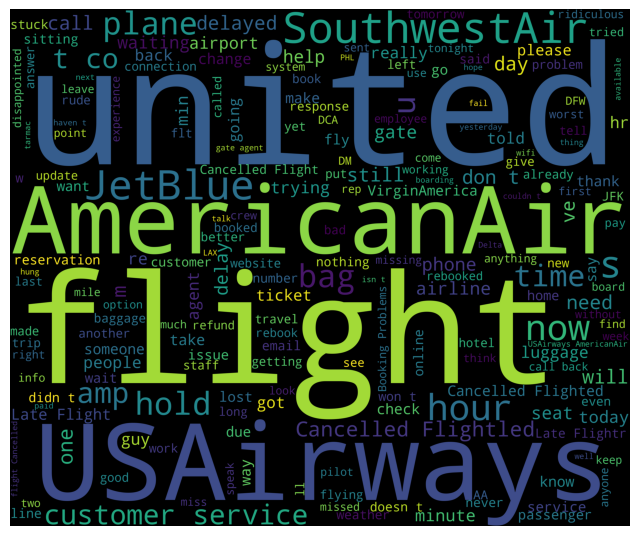

In [43]:
##Visual 1.3, a worldcloud of all us airline negative review. The top worlds are flight, united, usairways and americaair.
new_df=cleaned_df1[cleaned_df1['airline_sentiment']=='negative']
words = ' '.join(new_df['cleaned_text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(8, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Dataset 2

<Axes: xlabel='Electric Vehicle Type'>

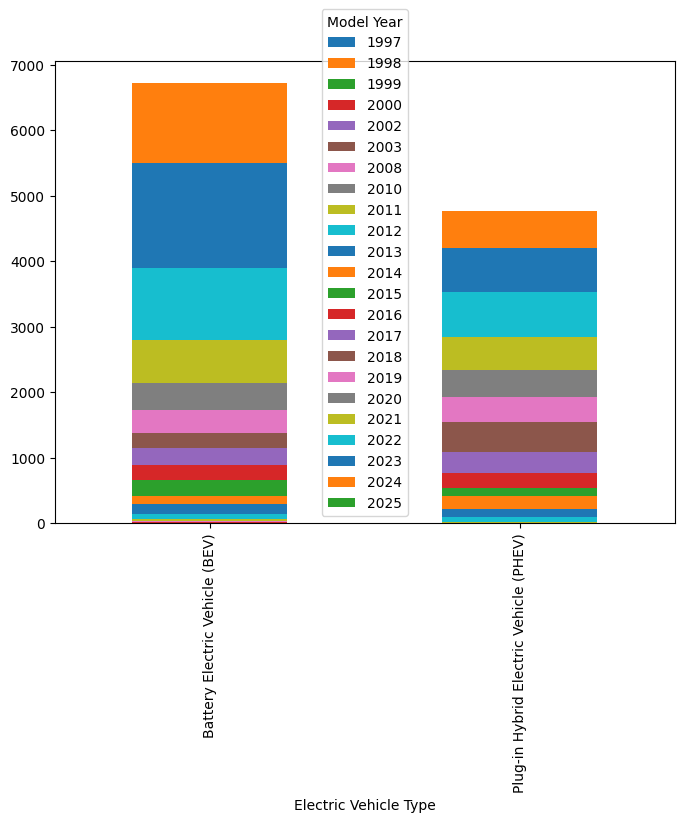

In [44]:
#Visual 2.1, a stacked bar plot of electric vehicle type and year
plot3 = cleaned_df2.groupby(['Electric Vehicle Type', 'Model Year']).size()
plot3.unstack().plot(kind='bar', stacked=True, figsize=(8,6))

<Axes: xlabel='Make'>

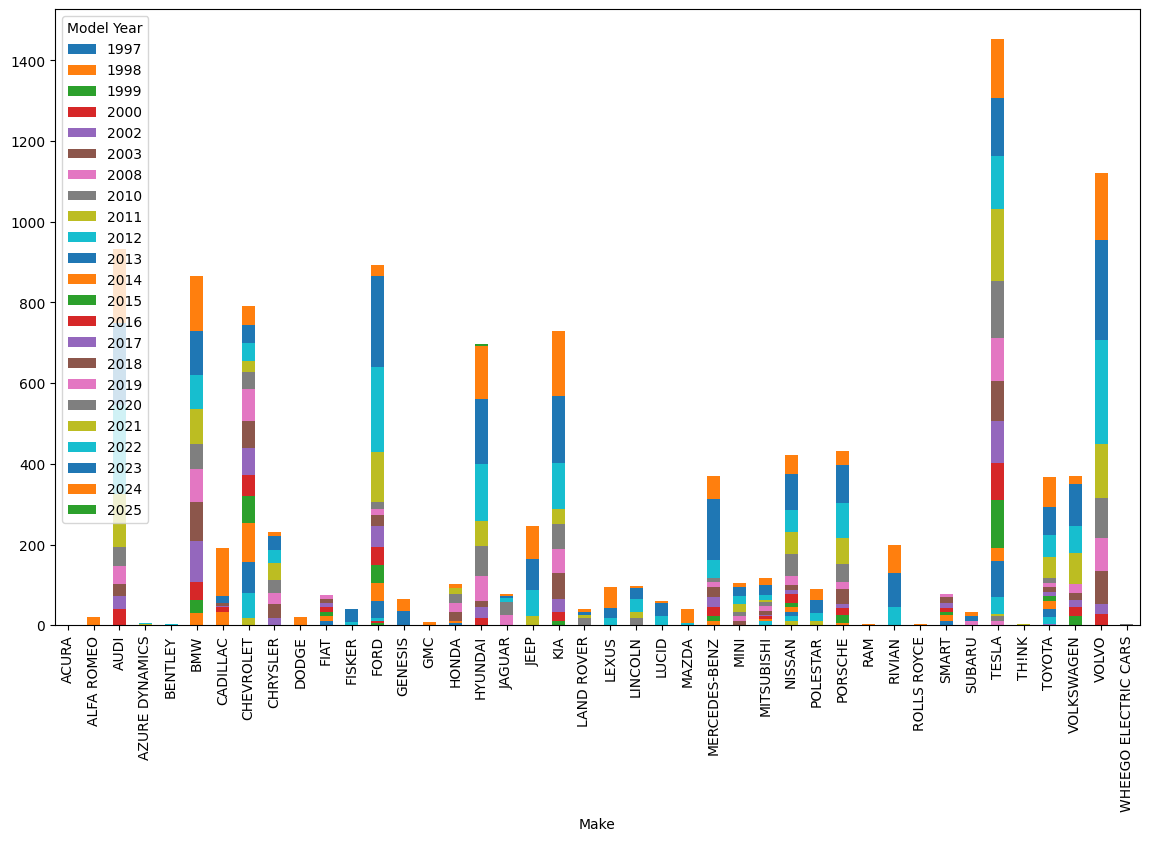

In [45]:
#Visual 2.2, a stacked bar plot of vehicle make and model year
plot4 = cleaned_df2.groupby(['Make', 'Model Year']).size()
plot4.unstack().plot(kind='bar', stacked=True, figsize=(14,8))

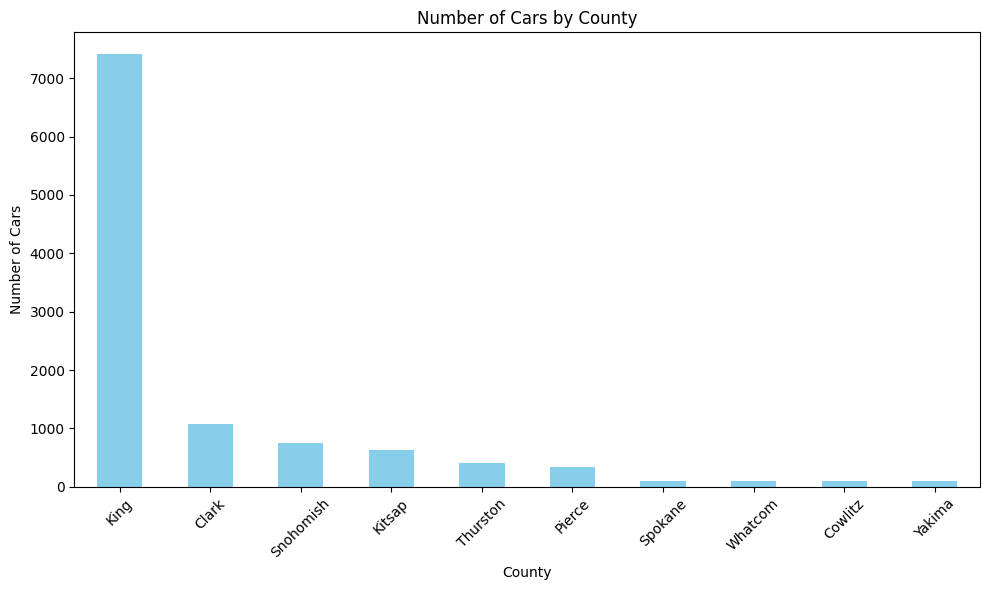

In [46]:
#Visual 2.3, a bar plot of the top 10 vehicle counts county
# Group by County and count the number of cars
county_counts = cleaned_df2.groupby("County")["VIN"].count()
# Sort the counties by car count in descending order
sorted_counts = county_counts.sort_values(ascending=False)
# Select the top 10 counties
top_10_counts = sorted_counts.head(10)
# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Cars by County")
plt.xlabel("County")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **5.2:** Reflection

Dataset 1, Twitter US Airline Sentiment Analysis

Here are our findings:
1. Sentiment Breakdown:
o	Negative reviews: 9082
o	Neutral reviews: 3069
o	Positive reviews: 2334
o	Overall, negative reviews outnumber positive ones.
2. Airline Rankings:
o	United Airlines has the highest number of negative reviews.
o	US Airways follows closely in second place.
o	Virgin America has the fewest negative reviews.
3. Negative Keywords:
o	Common negative keywords include “delayed,” “cancelled flights,” “poor customer service,” and “lost.”
o	All US airlines can enhance their services based on these insights.

While the dataset is substantial, it’s crucial to consider the volume of data for each airline. For instance, Virgin America has both the fewest negative and positive reviews, but its overall review count is significantly lower than other US airlines. To ensure reliable results, we recommend collecting at least 500 data points for each airline. Additionally, if time permits, grouping data by timeline could provide valuable insights. For example, comparing data from five years ago with the present would offer context for any changes in sentiment over time.


Dataset 2. Insights from Electric Vehicle Population Analysis

Here are our findings:

1. EV Type Popularity:
o	Battery electric vehicles (BEVs) have consistently outpaced plug-in hybrid vehicles (PHEVs) in popularity.
o	The peak year for BEV adoption was 1997.
2. Top EV Models:
o	Tesla emerges as the most popular EV brand, followed closely by Volvo.
o	Acura, Ford, and BMW have maintained similar sales figures over the years.
•	Regional Sales:
3. King County leads in EV sales, with approximately seven times the sales of the second-ranking county, Clark.

To enhance the analysis in this study, gathering additional vehicle reviews would provide valuable insights into both advantages and disadvantages. However, the limited availability of price data based on MSRP necessitates further research in the car market. Similarly, the insufficient electric range data should be excluded from the report.
